In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import phylovelo as pv
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from tqdm import tqdm

/home/wangkun/miniconda3/lib/python3.9/site-packages/phylovelo/sim_utils.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
ad = sc.read_text("/data3/wangkun/phylovelo_datasets/mouse_brain/exprMatrix.tsv.gz")
meta = pd.read_csv("/data3/wangkun/phylovelo_datasets/mouse_brain/meta.tsv", sep="\t", index_col=0)

In [ ]:
adata = ad.T

In [ ]:
xdr = pd.read_csv('/data3/wangkun/phylovelo_datasets/mouse_brain/BTSNE.coords.tsv', sep='\t', index_col=0, header=None)

In [ ]:
sel_cells = np.random.choice(meta.index, 10000, replace=False)

In [ ]:
adata = adata[sel_cells]
xdr = xdr.loc[sel_cells]
meta = meta.loc[sel_cells]

In [ ]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

In [ ]:
sd = pv.scData(x_normed=pd.DataFrame(adata.X, index=adata.obs_names, columns=adata.var_names), Xdr=xdr)

In [4]:
lt_vels = pd.read_csv('../megs/lt_megs.csv', index_col=0)

In [9]:
sd.x_normed.columns[0].split('|')[1]
vels = []
for i in sd.x_normed.columns:
    if i.split('|')[1] in lt_vels.index:
        vels.append(lt_vels.loc[i.split('|')[1]][1])
    else:
        vels.append(0)
vels = np.array(vels)

In [10]:
sd.velocity = vels

In [11]:
pv.velocity_embedding(sd, 'x_normed', 800)

  0%|          | 0/10000 [00:00<?, ?it/s]

/home/wangkun/miniconda3/lib/python3.9/site-packages/phylovelo/embedding.py:76: RuntimeWarning: invalid value encountered in true_divide
  dx = dx + (wi - 1 / n) * diff / np.sqrt((diff**2).sum())


In [12]:
sd.velocity_embeded[np.isnan(sd.velocity_embeded[:,0])] = [0,0]

In [ ]:
sd.cell_states = meta['Class'].to_numpy()

In [14]:
color_map = {'Blood':'#3a3b7b',
 'Choroid plexus':'#5253a3',
 'Early Neural Tube':'#637939',
 'Ectoderm':'#6c6ece',
 'Endoderm':'#9c9ddd',
 'Fibroblast':'#8ca152',
 'Glia':'#cfdb9d',
 'Immune':'#8c6e32',
 'Mesoderm':'#e7bb52',
 'Neural crest':'#e6cb93',
 'Neuron':'#d56069',
 'Node':'#e7969c',
 'OPCs':'#7b4173',
 'Pluripotent stem cells':'#a45195',
 'Radial glia':'#ce6dbe',
 'Schwann':'#dd9ed5',
 'Trophectoderm':'#3182be',
 'Vascular':'#6baed8'}

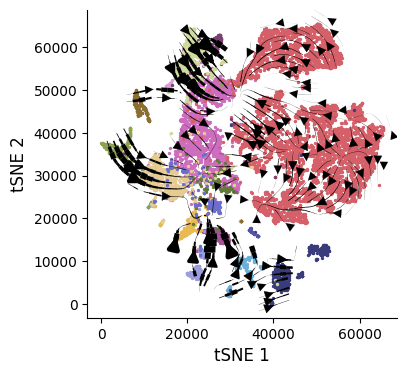

In [16]:
fig, ax = plt.subplots(figsize=(4, 4))
# ax.scatter(sd.Xdr.iloc[:, 0], sd.Xdr.iloc[:,1], c=time, s=2)
for i in set(sd.cell_states):
    ax.scatter(sd.Xdr.iloc[sd.cell_states==i, 0], sd.Xdr.iloc[sd.cell_states==i,1], c=color_map[i], s=2, label=i)
ax = pv.velocity_plot(sd.Xdr.to_numpy(), sd.velocity_embeded, ax, 'stream',streamdensity=1.6, grid_density=25, radius=1000, lw_coef=20, arrowsize=1.5)

ax.set_xlabel('tSNE 1', fontsize=12)
ax.set_ylabel('tSNE 2', fontsize=12)

# lgnd = ax.legend(bbox_to_anchor=(1,1), fontsize=9, loc='upper left', ncol=6)
# for i in lgnd.legendHandles:
#     i._sizes = [60]
# pv.label_name(sd.Xdr.to_numpy(), sd.cell_states, ax, fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [158]:
pv.calc_phylo_pseudotime(sd, r_sample=0.05, n_neighbors=30)

  0%|          | 0/499 [00:00<?, ?it/s]

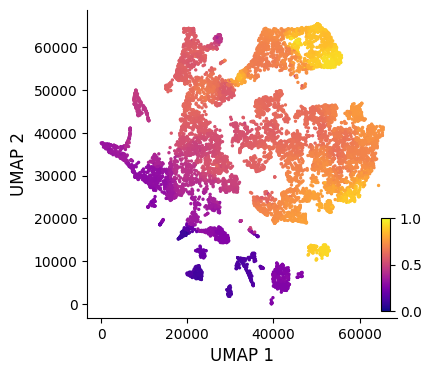

In [161]:
fig, ax = plt.subplots(figsize=(4, 4))
# ax.scatter(sd.Xdr.iloc[:, 0], sd.Xdr.iloc[:,1], c=time, s=2)
scatter = ax.scatter(sd.Xdr.iloc[:, 0], sd.Xdr.iloc[:,1], c=sd.phylo_pseudotime, cmap='plasma', s=2)
# ax = pv.ana_utils.velocity_plot(sd.Xdr.to_numpy(), sd.velocity_embeded, ax, 'stream',streamdensity=1.6, grid_density=25, radius=0.5, lw_coef=40000, arrowsize=1.5)

ax.set_xlabel('UMAP 1', fontsize=12)
ax.set_ylabel('UMAP 2', fontsize=12)

cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

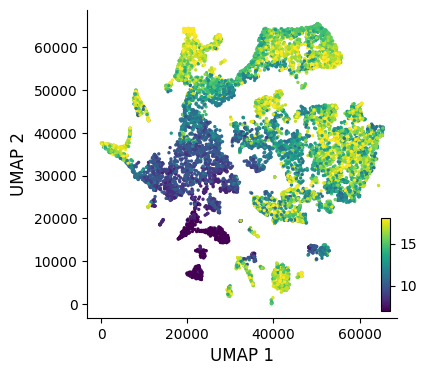

In [168]:
fig, ax = plt.subplots(figsize=(4, 4))
# ax.scatter(sd.Xdr.iloc[:, 0], sd.Xdr.iloc[:,1], c=time, s=2)
scatter = ax.scatter(sd.Xdr.iloc[:, 0], sd.Xdr.iloc[:,1], c=[float(i[1:]) for i in meta['Age']], s=2)
# ax = pv.ana_utils.velocity_plot(sd.Xdr.to_numpy(), sd.velocity_embeded, ax, 'stream',streamdensity=1.6, grid_density=25, radius=0.5, lw_coef=40000, arrowsize=1.5)

ax.set_xlabel('UMAP 1', fontsize=12)
ax.set_ylabel('UMAP 2', fontsize=12)

cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

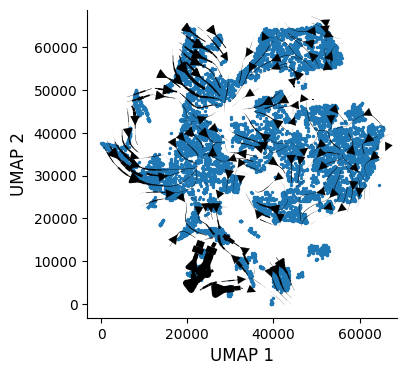

In [74]:
fig, ax = plt.subplots(figsize=(4, 4))
# ax.scatter(sd.Xdr.iloc[:, 0], sd.Xdr.iloc[:,1], c=time, s=2)
# for i in set(color):
ax.scatter(sd.Xdr.iloc[:, 0], sd.Xdr.iloc[:,1], s=2)
ax = pv.velocity_plot(sd.Xdr.to_numpy(), sd.velocity_embeded, ax, 'stream',streamdensity=1.6, grid_density=25, radius=1000, lw_coef=20, arrowsize=1.5)

ax.set_xlabel('UMAP 1', fontsize=12)
ax.set_ylabel('UMAP 2', fontsize=12)

# cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
# plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)